In [1]:
import inspect
import sys
import h5py
from tqdne.representations import *

def test_repr_inversion(data_repr, num_samples=5, datapath=Config().datasetdir / Config().data_test):
    # Get all the representation classes in tqdne.representations that are subclasses of Representation
    reprs = [m[1] for m in inspect.getmembers(sys.modules['tqdne.representations'], inspect.isclass)
               if issubclass(m[1], Representation) and m[1] != Representation]
    
    with h5py.File(datapath, "r", locking=False) as f: 
        waveforms = f["waveform"][:num_samples, :, :Config().signal_length]

    ch = 0    
    
    fig, axs = plt.subplots(num_samples, 1, figsize=(15, 5*num_samples))
    axs = np.atleast_1d(axs)
    for i in range(num_samples):
        wf = waveforms[i]
        axs[i].plot(wf[ch], label="Original", linestyle="--", linewidth=1)
        inverted_wf = data_repr.invert_representation(data_repr.get_representation(wf[None, ...]))[0]
        axs[i].plot(inverted_wf[ch], label="Inverted", linewidth=1, alpha=0.5)
        errors = np.where(np.abs(wf[ch] - inverted_wf[ch]) > 1e-6)[0]
        print("Errors:\n", np.abs(wf[ch, errors] - inverted_wf[ch, errors])) if len(errors) > 0 else None
        if len(errors) > 0:
            axs[i].scatter(errors, wf[ch, errors], color="red", zorder=0.5, label="Errors", marker="x")
        axs[i].set_title(f"Sample {i} -- Channel {ch}")
        axs[i].legend()

In [2]:
test_repr_inversion(SignalWithEnvelope(env_function="hilbert", env_function_params={}, env_transform="log", env_transform_params={}, scaling={"type": "normalize", "scalar": True}))  

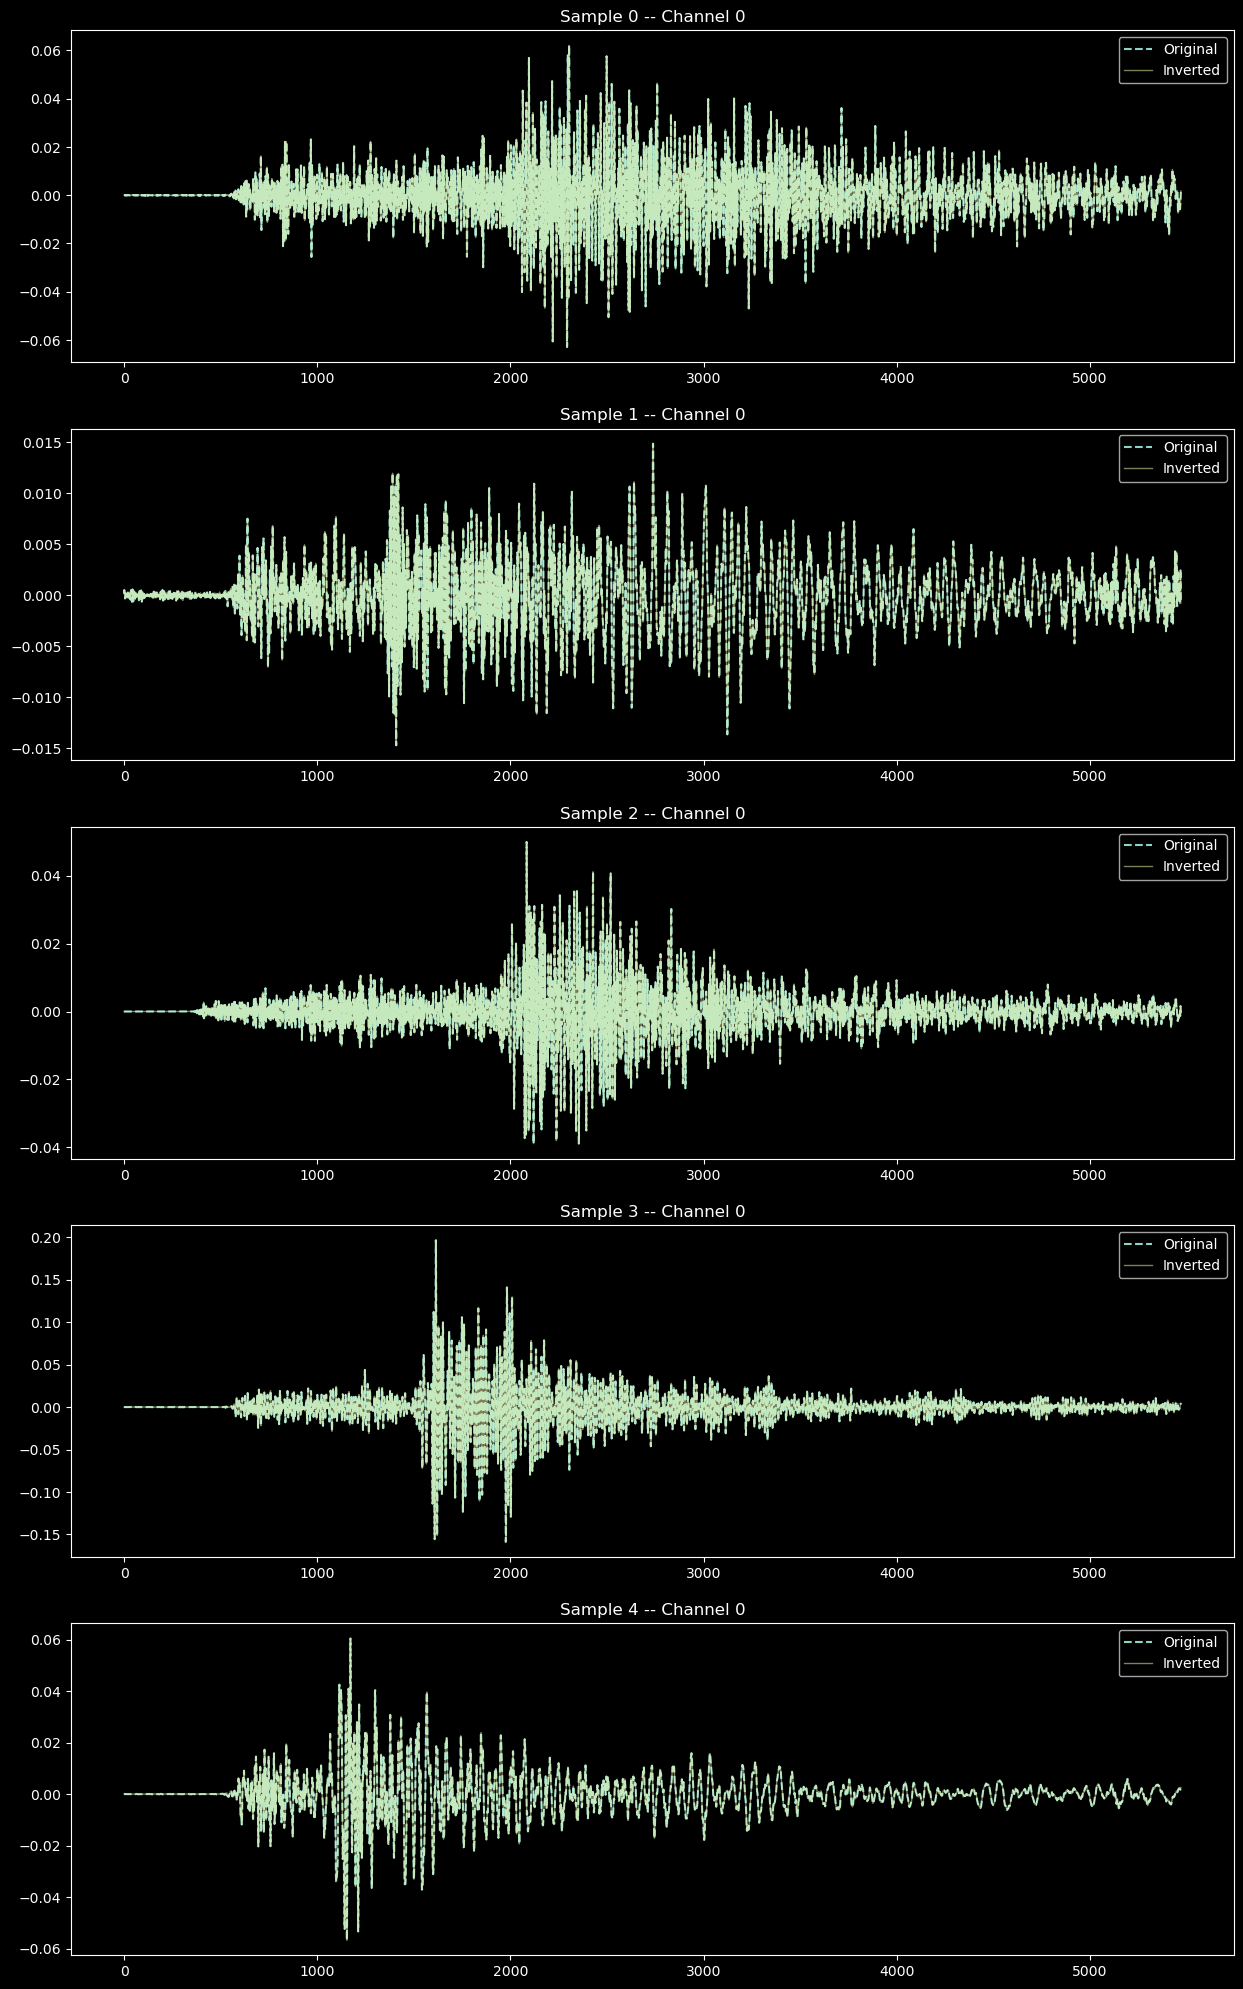

In [44]:
test_repr_inversion(SignalWithEnvelope(env_function="moving_average", env_function_params={}, env_transform="log", env_transform_params={}, scaling={"type": "normalize", "scalar": True}))  

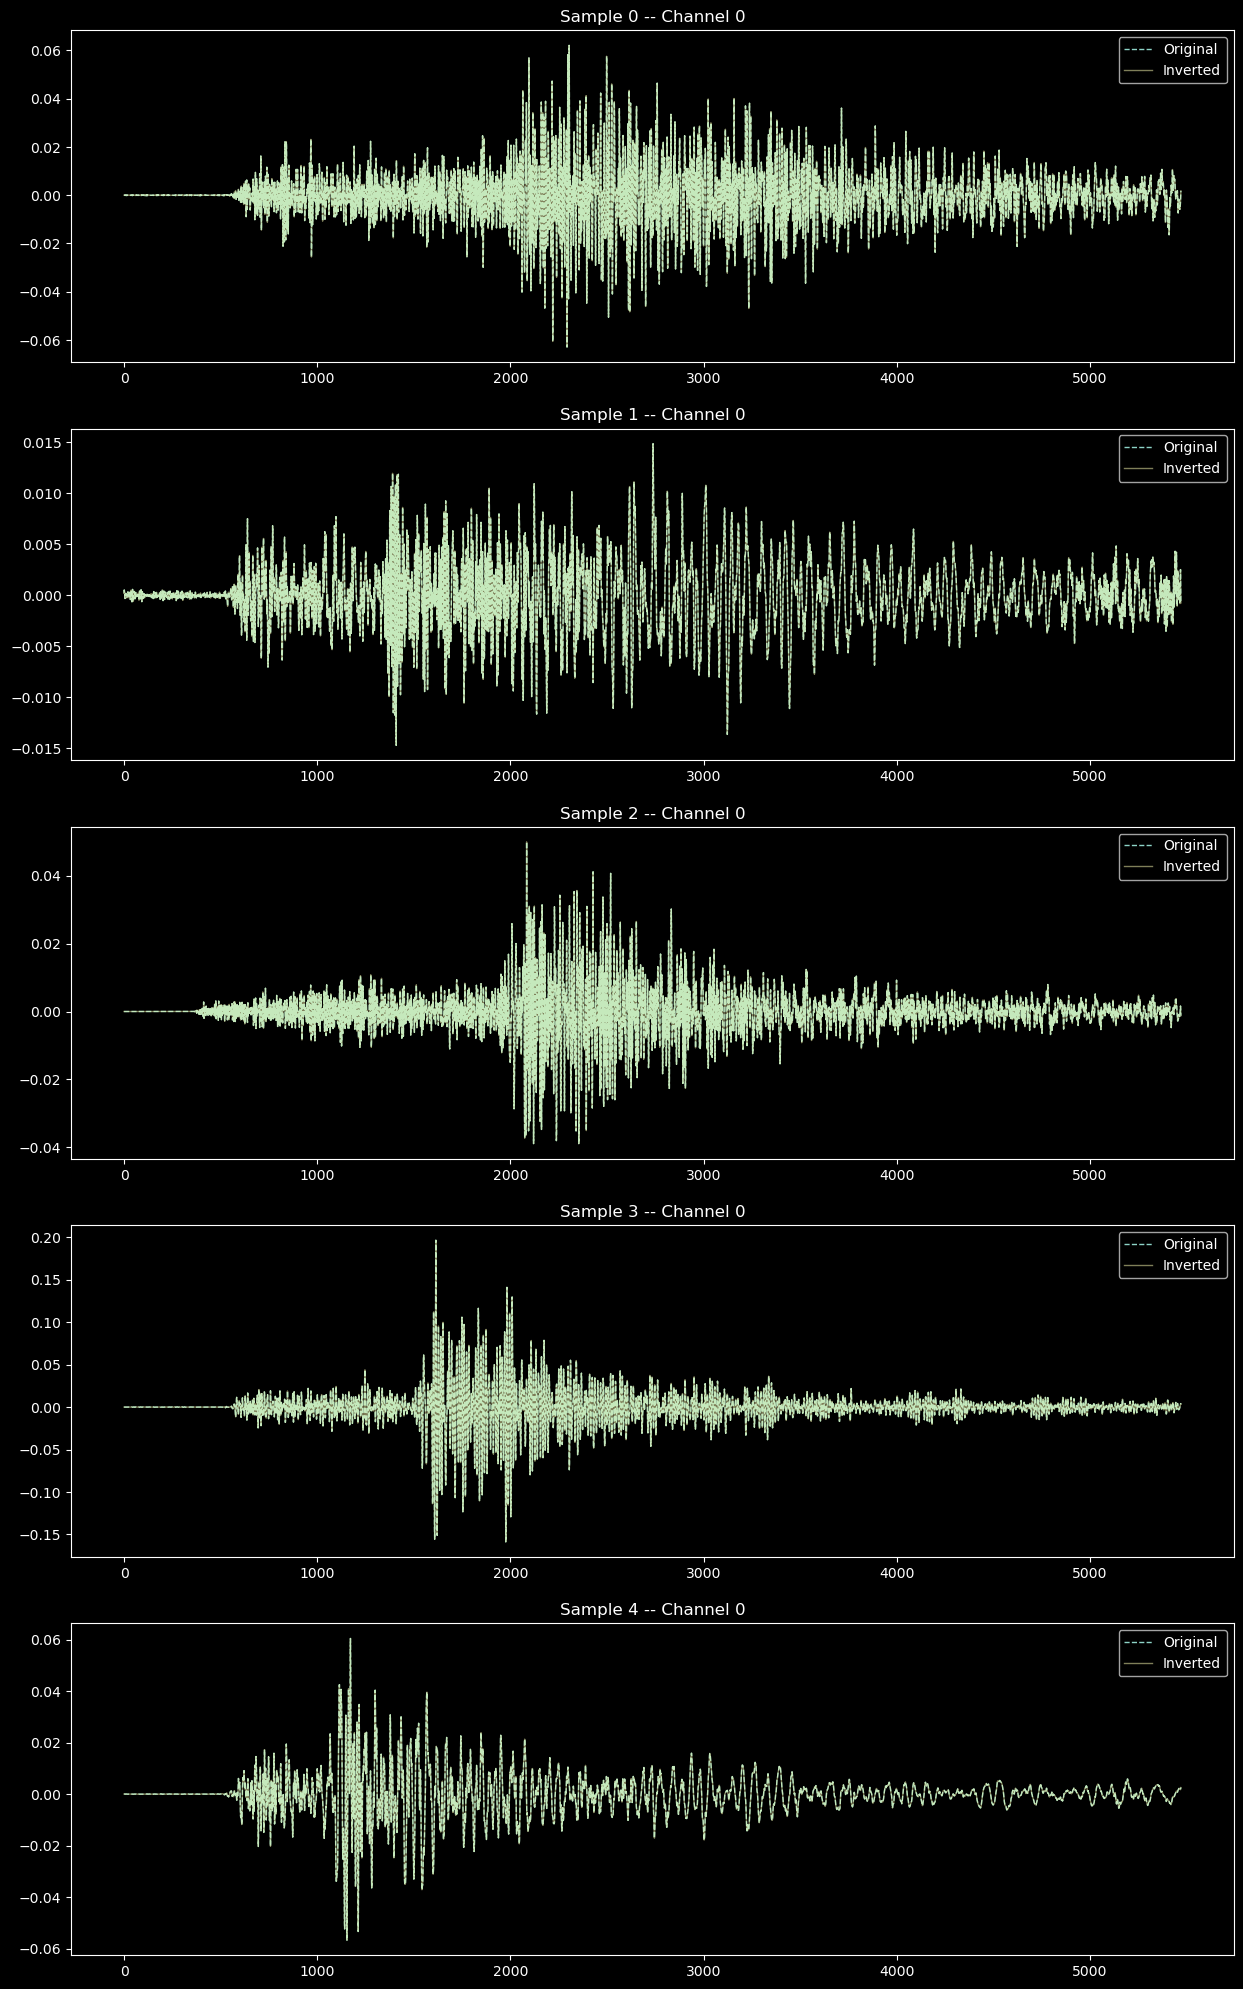

In [3]:
test_repr_inversion(SignalWithEnvelope(env_function="moving_average_shifted", env_function_params={}, env_transform="log", env_transform_params={}, scaling={"type": "normalize", "scalar": True}))  

[3.22228188e-05]
[0.00020773]
[1.08983668e-05]
[3.44183936e-05]


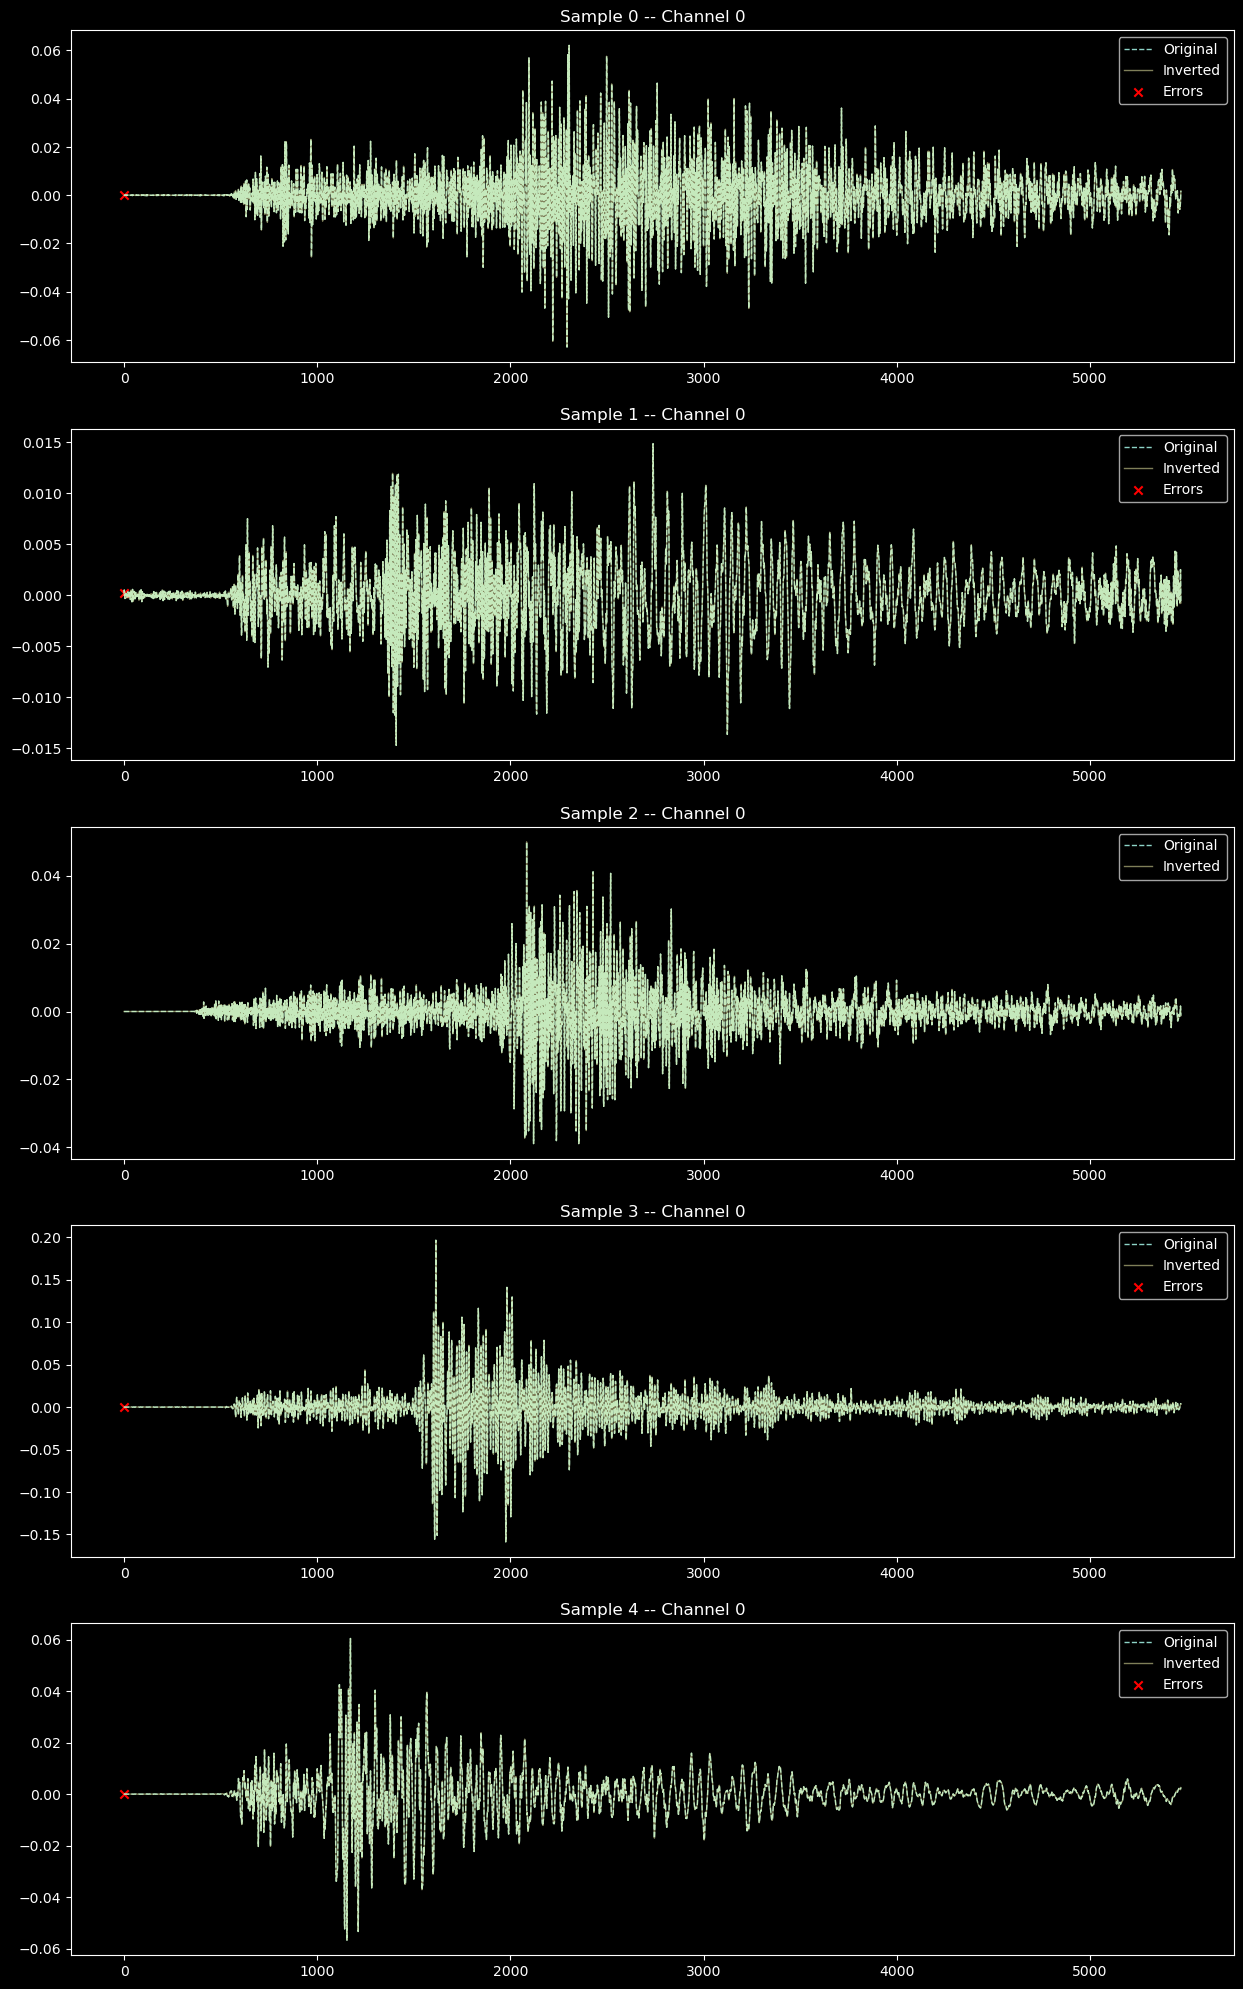

In [4]:
test_repr_inversion(SignalWithEnvelope(env_function="first_order_lp", env_function_params={}, env_transform="log", env_transform_params={}, scaling={"type": "normalize", "scalar": True}))  

[1.6201158e-05 3.9796763e-05 6.1070445e-05 ... 3.6456715e-03 9.8873221e-04
 3.5781632e-03]
[0.00064037 0.00092079 0.00048092 ... 0.00303973 0.00295699 0.00095207]
[1.1026567e-06 1.1436015e-06 1.1104235e-06 ... 2.5451337e-03 1.6671086e-03
 6.7341089e-04]
[1.2525702e-05 2.4289366e-06 4.6979385e-05 ... 1.3538599e-03 3.8359051e-03
 4.8375083e-03]
[1.2551838e-05 6.4350061e-06 1.1335091e-05 ... 3.2249356e-03 3.8935568e-03
 4.7616092e-03]


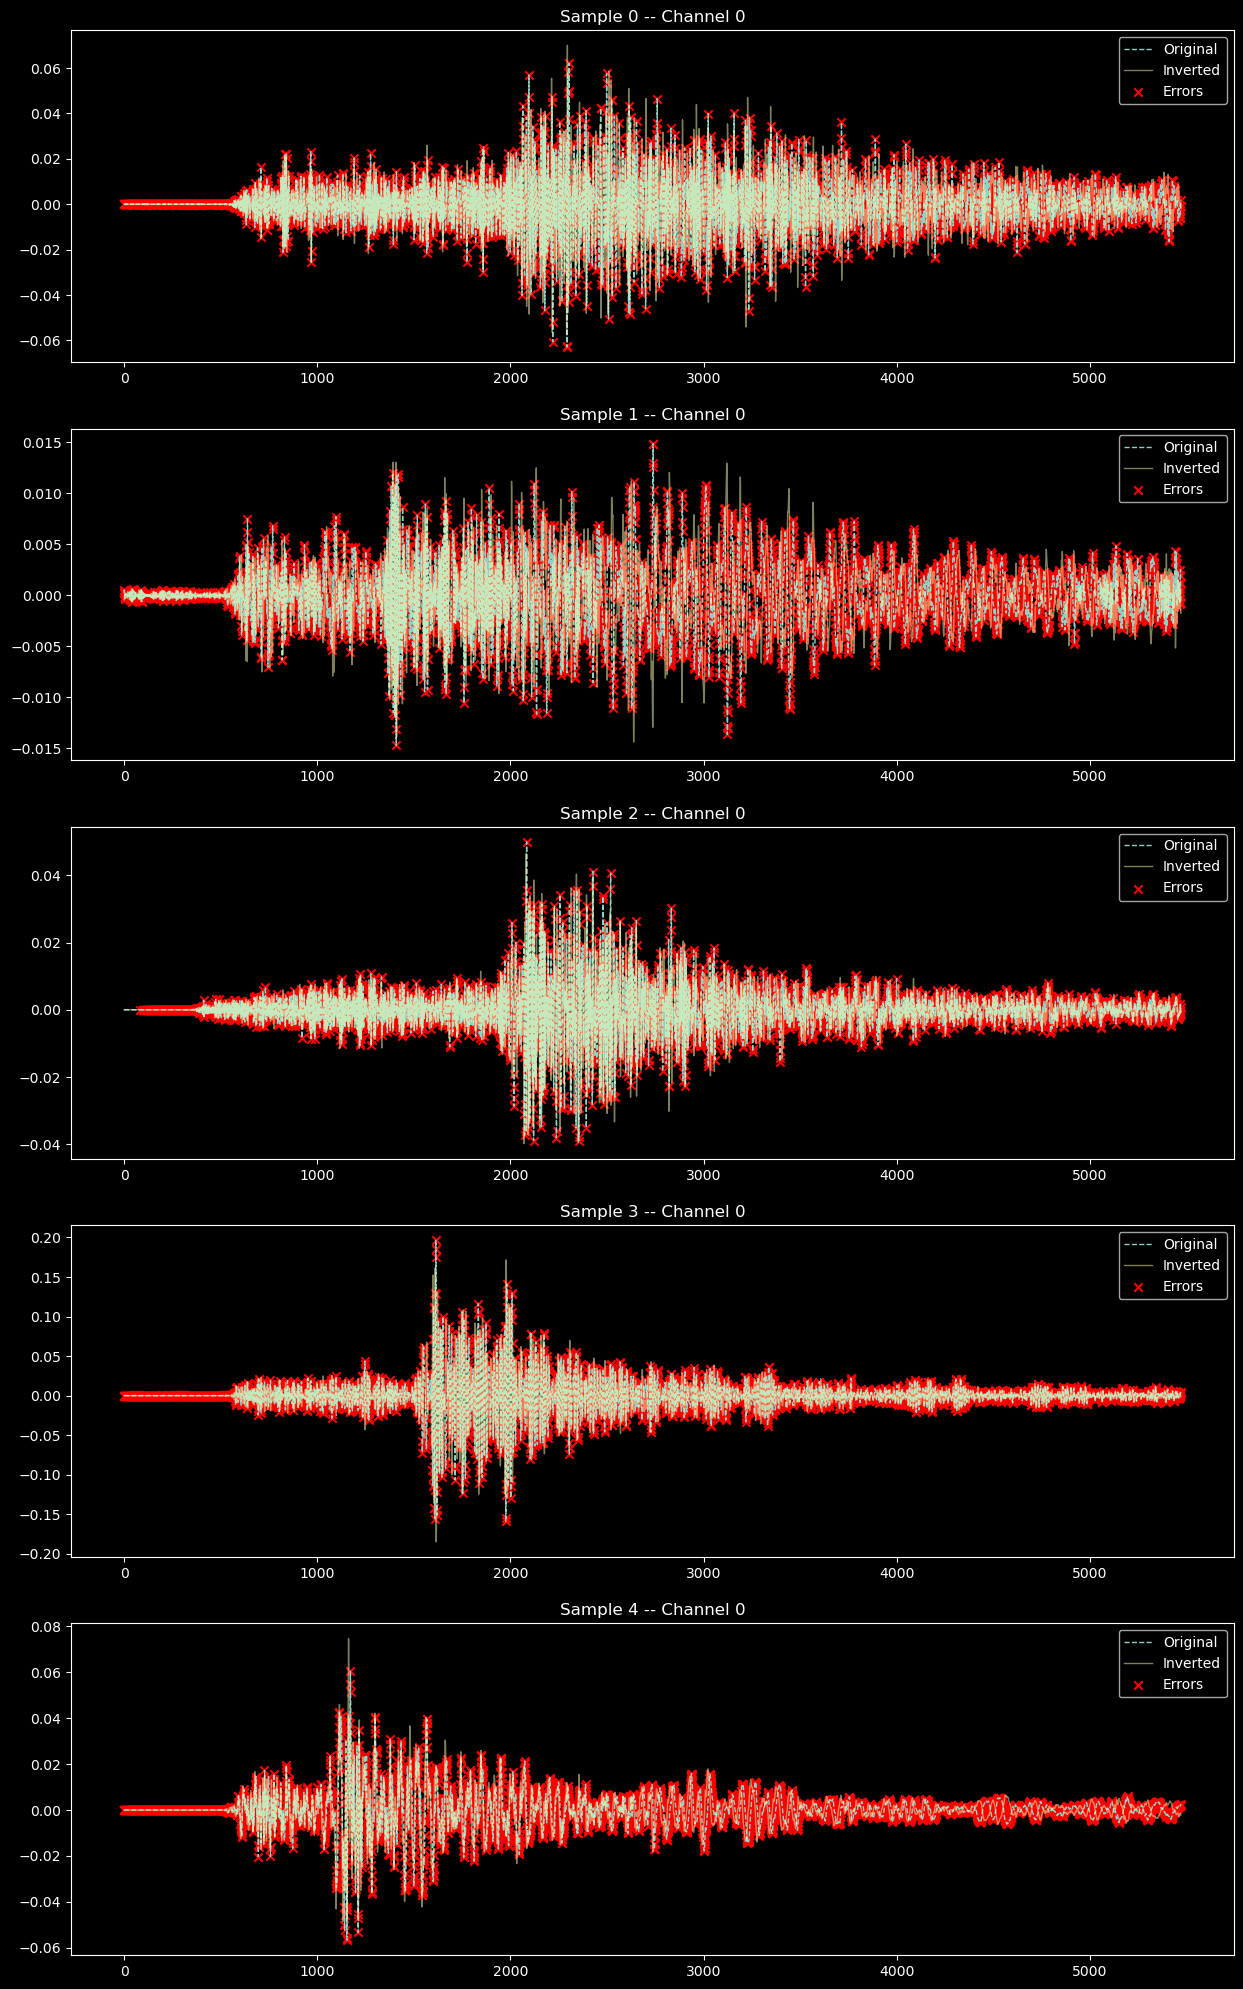

In [5]:
test_repr_inversion(LogSpectrogram())  

[1.6201158e-05 3.9796763e-05 6.1070445e-05 ... 3.6456715e-03 9.8873221e-04
 3.5781632e-03]


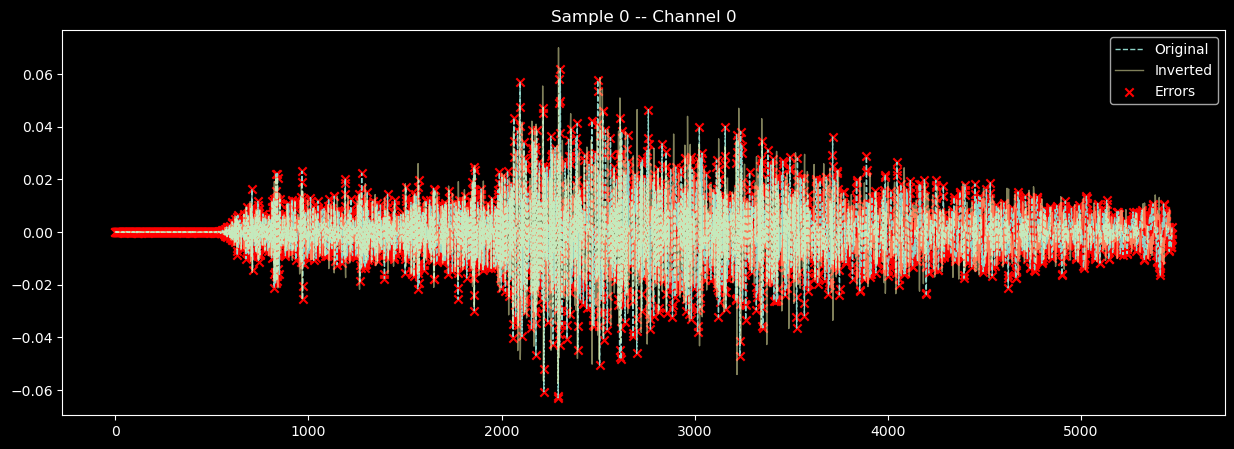

In [6]:
test_repr_inversion(LogSpectrogram(), num_samples=1) 

In [12]:
from tqdne.dataset import EnvelopeDataset
from tqdne.conf import Config

config = Config()
test_dataset_path = config.datasetdir / config.data_test
test_dataset = EnvelopeDataset(test_dataset_path, SignalWithEnvelope(env_function="hilbert", env_function_params={}, env_transform="log", env_transform_params={}, scaling={"type": "normalize", "scalar": True}), config.signal_length)

random_cond = test_dataset.features[np.random.choice(len(test_dataset.features), 100)]
random_cond = np.repeat(random_cond, 20000, axis=0)

assert len(random_cond) > len(test_dataset.features)

test_dataset.get_waveforms_by_cond_input(random_cond).shape